In [1]:
import pandas as pd
data = pd.read_csv('AEGISDataset.csv')
data

,lat,lon,flood_heig,elevation,precipitat
0,14.640394,121.055708,0,54.553295,9.0
1,14.698299,121.002132,0,21.856272,10.0
2,14.698858,121.100261,0,69.322807,16.0
3,14.571310,120.983334,0,10.987241,8.0
4,14.762232,121.075735,0,87.889847,18.0
...,...,...,...,...,...
3505,14.565436,121.132076,8,12.006505,14.0
3506,14.633785,120.978465,8,8.572678,8.0
3507,14.563166,121.121095,8,5.772885,13.0
3508,14.549214,121.028014,8,22.342602,7.0


In [2]:
data['flood_heig'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

C:\Users\ivan\AppData\Local\Temp\ipykernel_4848\3808044947.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


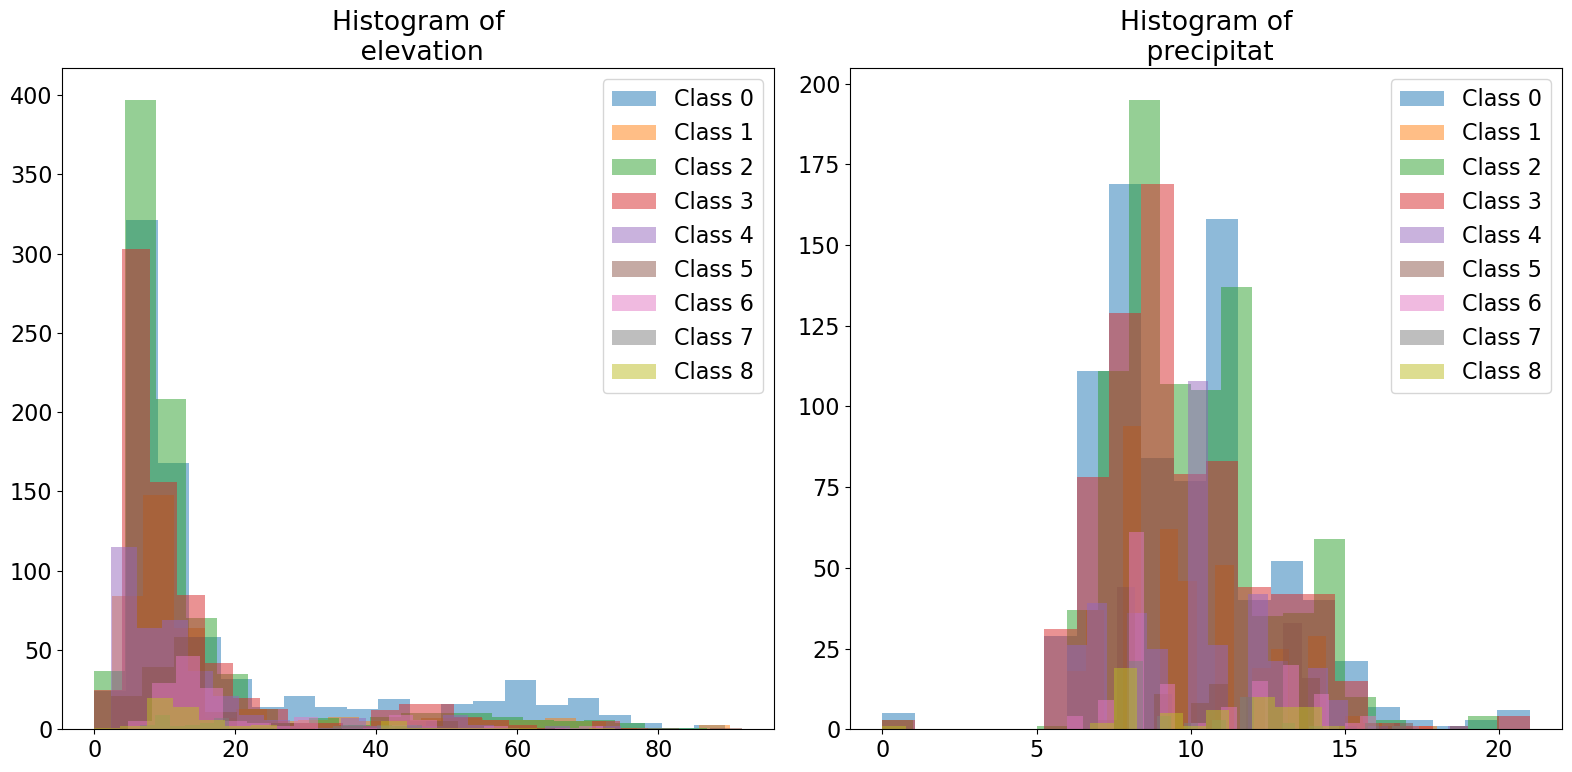

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_filtered = data.dropna()

float_list = ['elevation', 'precipitat']

# Unique classes in the 'Class' column
unique_classes = df_filtered['flood_heig'].unique()

# Number of rows and columns for subplots
n_rows = 1
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over them

# Set the font size
plt.rcParams.update({'font.size': 16})

# Plot histograms
for idx, col in enumerate(float_list):
    ax = axes[idx]
    for cls in unique_classes:
        # Filter data by class
        filtered_data = df_filtered[df_filtered['flood_heig'] == cls]
        # Calculate the optimal number of bins
        ax.hist(filtered_data[col], bins=20, alpha=0.5, label=f'Class {cls}')
    ax.set_title(f'Histogram of\n {col}')
    ax.legend()


# Hide unused subplots if there are any
for j in range(len(float_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('hists_Manila.pdf')
# Show the plot
plt.show()

In [7]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
df_filtered = pd.read_csv('AEGISDataset.csv')

# Define the unique flood height levels
unique_classes = sorted(df_filtered['flood_heig'].unique())

# Define 9 colors for the flood height levels (0 to 8)
colors = ['green', 'blue', 'purple', 'orange', 'darkred', 'red', 'black', 'darkpurple', 'cadetblue']

# Create the map centered around the average coordinates
m = folium.Map(location=[df_filtered['lat'].mean(), df_filtered['lon'].mean()], zoom_start=12)

# Add marker clusters to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each point in the dataset
for _, row in df_filtered.iterrows():
    # Determine the color of the marker based on the flood height level
    color = colors[int(row['flood_heig'])]
    
    # Add the marker to the map
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=(
            f"Elevation: {row['elevation']} meters<br>"
            f"Precipitation: {row['precipitat']} mm/hour<br>"
            f"Flood Height: {row['flood_heig']} ({row['flood_heig']})<br>"
        ),
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Create the HTML for the legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 300px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; 0 (No flood) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; 1 (Ankle High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; 2 (Knee High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i><br>
     &nbsp; 3 (Waist High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
     &nbsp; 4 (Neck High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:darkred"></i><br>
     &nbsp; 5 (Top of Head High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; 6 (1-storey High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i><br>
     &nbsp; 7 (1.5-storey High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:darkpurple"></i><br>
     &nbsp; 8 (2-storeys or Higher) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:cadetblue"></i>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('pluvial_flood_map_with_legend_Manila.html')

# For displaying the map in a Jupyter Notebook (if needed)
#m


In [8]:
import pandas as pd
import folium

# Load the dataset
df_filtered = pd.read_csv('AEGISDataset.csv')

# Define the unique flood height levels
unique_classes = sorted(df_filtered['flood_heig'].unique())

# Define 9 colors for the flood height levels (0 to 8)
colors = ['green', 'blue', 'purple', 'orange', 'darkred', 'red', 'black', 'darkpurple', 'cadetblue']

# Create the map centered around the average coordinates
m = folium.Map(location=[df_filtered['lat'].mean(), df_filtered['lon'].mean()], zoom_start=12)

# Create a FeatureGroup layer for markers
fg = folium.FeatureGroup(name='Markers').add_to(m)

# Add markers for each point in the dataset
for _, row in df_filtered.iterrows():
    # Determine the color of the marker based on the flood height level
    color = colors[int(row['flood_heig'])]
    
    # Add the marker to the FeatureGroup layer
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=(
            f"Elevation: {row['elevation']} meters<br>"
            f"Precipitation: {row['precipitat']} mm/hour<br>"
            f"Flood Height: {row['flood_heig']} ({row['flood_heig']})<br>"
        ),
        icon=folium.Icon(color=color)
    ).add_to(fg)

# Create the HTML for the legend (same as before)
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 300px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; 0 (No flood) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; 1 (Ankle High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; 2 (Knee High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i><br>
     &nbsp; 3 (Waist High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
     &nbsp; 4 (Neck High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:darkred"></i><br>
     &nbsp; 5 (Top of Head High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; 6 (1-storey High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i><br>
     &nbsp; 7 (1.5-storey High) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:darkpurple"></i><br>
     &nbsp; 8 (2-storeys or Higher) &nbsp; <i class="fa fa-map-marker fa-2x" style="color:cadetblue"></i>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('pluvial_flood_map_with_legend_Manila+.html')

# For displaying the map in a Jupyter Notebook (if needed)
#m


In [9]:
import pandas as pd
import folium

# Load the dataset
df_filtered = pd.read_csv('AEGISDataset.csv')

# Define the unique flood height levels
unique_classes = sorted(df_filtered['flood_heig'].unique())

# Define 9 colors for the flood height levels (0 to 8)
colors = ['green', 'blue', 'purple', 'orange', 'darkred', 'red', 'black', 'darkpurple', 'cadetblue']

# Create the map centered around the average coordinates
m = folium.Map(location=[df_filtered['lat'].mean(), df_filtered['lon'].mean()], zoom_start=12)

# Add circles for each point in the dataset
for _, row in df_filtered.iterrows():
    # Determine the color of the circle based on the flood height level
    color = colors[int(row['flood_heig'])]
    
    # Add circle marker to the map
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,  # Adjust the radius as needed
        color=color,
        fill=True,
        fill_color=color,
        popup=(
            f"Elevation: {row['elevation']} meters<br>"
            f"Precipitation: {row['precipitat']} mm/hour<br>"
            f"Flood Height: {row['flood_heig']} ({row['flood_heig']})<br>"
        ),
    ).add_to(m)

# Create the HTML for the legend (same as before)
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 300px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; 0 (No flood) &nbsp; <i class="fa fa-circle" style="color:green"></i><br>
     &nbsp; 1 (Ankle High) &nbsp; <i class="fa fa-circle" style="color:blue"></i><br>
     &nbsp; 2 (Knee High) &nbsp; <i class="fa fa-circle" style="color:purple"></i><br>
     &nbsp; 3 (Waist High) &nbsp; <i class="fa fa-circle" style="color:orange"></i><br>
     &nbsp; 4 (Neck High) &nbsp; <i class="fa fa-circle" style="color:darkred"></i><br>
     &nbsp; 5 (Top of Head High) &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
     &nbsp; 6 (1-storey High) &nbsp; <i class="fa fa-circle" style="color:black"></i><br>
     &nbsp; 7 (1.5-storey High) &nbsp; <i class="fa fa-circle" style="color:darkpurple"></i><br>
     &nbsp; 8 (2-storeys or Higher) &nbsp; <i class="fa fa-circle" style="color:cadetblue"></i>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('pluvial_flood_map_with_legend_Manila_points.html')

# For displaying the map in a Jupyter Notebook (if needed)
#m


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the dataset
data = pd.read_csv('AEGISDataset.csv')

# Split data into features and target
X = data.drop(['flood_heig'], axis=1)
y = data['flood_heig']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Print the original labels and their corresponding encoded values
print("Original labels and their encoded values:")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original}: {encoded}")

# Optionally, print the first few rows of encoded target to verify
print("\nFirst few rows of encoded target:")
print(y_categorical[:5])



Original labels and their encoded values:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8

First few rows of encoded target:
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os

# Load the dataset
data = pd.read_csv('AEGISDataset.csv')

# Split data into features and target
X = data.drop(['flood_heig'], axis=1)
y = data['flood_heig']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the search space for hyperparameters
search_space = {
    'num_layers': np.arange(1, 20),  # Number of layers
    'neurons_per_layer': np.arange(1, 128, 1),  # Neurons per layer
    'activation_functions': ['relu', 'sigmoid', 'tanh', 'softmax', 'softplus',
                             'softsign', 'elu', 'selu', 'gelu', 'hard_sigmoid', 'linear'],  # Activation functions
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'],  # Optimizers
    'alphas': [0.0001, 0.001, 0.01, 0.1],  # Learning rates
    'loss_functions': ['categorical_crossentropy']#, 'sparse_categorical_crossentropy']
}

# Function to get optimizer object
def get_optimizer(name, alpha):
    optimizers = {
        'adam': Adam(learning_rate=alpha),
        'sgd': SGD(learning_rate=alpha),
        'rmsprop': RMSprop(learning_rate=alpha),
        'adagrad': Adagrad(learning_rate=alpha),
        'adadelta': Adadelta(learning_rate=alpha),
        'adamax': Adamax(learning_rate=alpha),
        'nadam': Nadam(learning_rate=alpha)
    }
    return optimizers[name]

# Define the fitness function
def evaluate_model(params, individual_id):
    num_layers = params['num_layers']
    neurons_per_layer = params['neurons_per_layer']
    activation_functions = params['activation_functions']
    optimizer_name = params['optimizer']
    alpha = params['alpha']
    loss_function = params['loss_function']
    
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], activation=activation_functions[0], input_shape=(X_train.shape[1],)))
    for i in range(1, num_layers):
        model.add(Dense(neurons_per_layer[i], activation=activation_functions[i]))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    optimizer = get_optimizer(optimizer_name, alpha)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(true_classes, predicted_classes)
    
    # Save parameters to a .txt file
    with open(f'individuals_Manila/individual_{individual_id}_params.txt', 'w') as file:
        file.write(f'num_layers: {num_layers}\n')
        file.write(f'neurons_per_layer: {neurons_per_layer}\n')
        file.write(f'activation_functions: {activation_functions}\n')
        file.write(f'optimizer: {optimizer_name}\n')
        file.write(f'alpha: {alpha}\n')
        file.write(f'loss_function: {loss_function}\n')
        file.write(f'accuracy: {accuracy}\n')
    
    # Save loss history to a .txt file
    with open(f'individuals_Manila/individual_{individual_id}_loss_history.txt', 'w') as file:
        for loss in history.history['loss']:
            file.write(f'{loss}\n')
    
    # Save y_test and y_pred to a .txt file
    with open(f'individuals_Manila/individual_{individual_id}_predictions.txt', 'w') as file:
        for index, true, pred in zip(list(range(len(true_classes))), true_classes, predicted_classes):
            file.write(f'{index}, {true}, {pred}\n')
    
    return accuracy

# Define the genetic algorithm operations
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        num_layers = np.random.choice(search_space['num_layers'])
        neurons_per_layer = np.random.choice(search_space['neurons_per_layer'], num_layers).tolist()
        activation_functions = np.random.choice(search_space['activation_functions'], num_layers).tolist()
        optimizer = np.random.choice(search_space['optimizers'])
        alpha = np.random.choice(search_space['alphas'])
        loss_function = np.random.choice(search_space['loss_functions'])
        chromosome = {
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'activation_functions': activation_functions,
            'optimizer': optimizer,
            'alpha': alpha,
            'loss_function': loss_function
        }
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    child = {}
    child['num_layers'] = np.random.choice([parent1['num_layers'], parent2['num_layers']])
    child['neurons_per_layer'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['neurons_per_layer'], parent2['neurons_per_layer'])]
    child['activation_functions'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['activation_functions'], parent2['activation_functions'])]
    child['optimizer'] = np.random.choice([parent1['optimizer'], parent2['optimizer']])
    child['alpha'] = np.random.choice([parent1['alpha'], parent2['alpha']])
    child['loss_function'] = np.random.choice([parent1['loss_function'], parent2['loss_function']])
    # Adjust the lists to the number of layers
    child['neurons_per_layer'] = child['neurons_per_layer'][:child['num_layers']]
    child['activation_functions'] = child['activation_functions'][:child['num_layers']]
    return child

def mutate(chromosome):
    key_to_mutate = np.random.choice(['num_layers', 'neurons_per_layer', 'activation_functions', 'optimizer', 'alpha', 'loss_function'])
    if key_to_mutate == 'num_layers':
        chromosome[key_to_mutate] = np.random.choice(search_space['num_layers'])
        chromosome['neurons_per_layer'] = np.random.choice(search_space['neurons_per_layer'], chromosome[key_to_mutate]).tolist()
        chromosome['activation_functions'] = np.random.choice(search_space['activation_functions'], chromosome[key_to_mutate]).tolist()
    elif key_to_mutate == 'neurons_per_layer':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['neurons_per_layer'])
    elif key_to_mutate == 'activation_functions':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['activation_functions'])
    elif key_to_mutate == 'optimizer':
        chromosome[key_to_mutate] = np.random.choice(search_space['optimizers'])
    elif key_to_mutate == 'alpha':
        chromosome[key_to_mutate] = np.random.choice(search_space['alphas'])
    elif key_to_mutate == 'loss_function':
        chromosome[key_to_mutate] = np.random.choice(search_space['loss_functions'])
    
    # Adjust the lists to the number of layers
    chromosome['neurons_per_layer'] = chromosome['neurons_per_layer'][:chromosome['num_layers']]
    chromosome['activation_functions'] = chromosome['activation_functions'][:chromosome['num_layers']]
    
    return chromosome

def select_parents(population, num_parents):
    sorted_population = sorted(population, key=lambda x: x['fitness'], reverse=True)
    return sorted_population[:num_parents]

# Define the genetic algorithm parameters
population_size = 1000
num_generations = 10
num_parents_to_select = 10

# Initialize the population
population = initialize_population(population_size)

# Store parameters and accuracies on each iteration
results = []

# Main loop of the genetic algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    for i, individual in enumerate(population):
        individual['fitness'] = evaluate_model(individual, f'g{generation}_i{i}')
    
    # Store parameters and accuracies
    for individual in population:
        result = {
            'num_layers': individual['num_layers'],
            'neurons_per_layer': individual['neurons_per_layer'],
            'activation_functions': individual['activation_functions'],
            'optimizer': individual['optimizer'],
            'alpha': individual['alpha'],
            'loss_function': individual['loss_function'],
            'accuracy': individual['fitness']
        }
        results.append(result)
    
    # Select the best individuals as parents for the next generation
    parents = select_parents(population, num_parents_to_select)
    
    # Generate offspring through crossover and mutation
    offspring = []
    while len(offspring) < population_size:
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        child = crossover(parent1, parent2)
        if np.random.rand() < 0.1:  # Mutation probability
            child = mutate(child)
        offspring.append(child)
    
    # Replace the old population with the offspring
    population = offspring

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('genetic_algorithm_results.csv', index=False)


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 1ms/step


22/22 [==============================] - 0s 2ms/step


In [4]:
import pandas as pd

# Assuming the data has been read into the DataFrame
data = pd.read_csv('AEGISDataset.csv')

# Define the mapping from flood_heig values to the new labels
flood_heig_mapping = {
    7: 'Very_High',
    8: 'Very_High',
    5: 'High',
    6: 'High',
    3: 'Moderate',
    4: 'Moderate',
    1: 'Low',
    2: 'Low',
    0: 'No_Flood'
}

# Create the new column using the mapping
data['flood_category'] = data['flood_heig'].map(flood_heig_mapping)

data.to_excel('AEGISDataset_5classes.xlsx')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os

# Load the dataset
data = pd.read_excel('AEGISDataset_5classes.xlsx')

# Split data into features and target
X = data.drop(['flood_heig', 'flood_category'], axis=1)
y = data['flood_category']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the search space for hyperparameters
search_space = {
    'num_layers': np.arange(1, 20),  # Number of layers
    'neurons_per_layer': np.arange(1, 128, 1),  # Neurons per layer
    'activation_functions': ['relu', 'sigmoid', 'tanh', 'softmax', 'softplus',
                             'softsign', 'elu', 'selu', 'gelu', 'hard_sigmoid', 'linear'],  # Activation functions
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'],  # Optimizers
    'alphas': [0.0001, 0.001, 0.01, 0.1],  # Learning rates
    'loss_functions': ['categorical_crossentropy']#, 'sparse_categorical_crossentropy']
}

# Function to get optimizer object
def get_optimizer(name, alpha):
    optimizers = {
        'adam': Adam(learning_rate=alpha),
        'sgd': SGD(learning_rate=alpha),
        'rmsprop': RMSprop(learning_rate=alpha),
        'adagrad': Adagrad(learning_rate=alpha),
        'adadelta': Adadelta(learning_rate=alpha),
        'adamax': Adamax(learning_rate=alpha),
        'nadam': Nadam(learning_rate=alpha)
    }
    return optimizers[name]

# Define the fitness function
def evaluate_model(params, individual_id):
    num_layers = params['num_layers']
    neurons_per_layer = params['neurons_per_layer']
    activation_functions = params['activation_functions']
    optimizer_name = params['optimizer']
    alpha = params['alpha']
    loss_function = params['loss_function']
    
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], activation=activation_functions[0], input_shape=(X_train.shape[1],)))
    for i in range(1, num_layers):
        model.add(Dense(neurons_per_layer[i], activation=activation_functions[i]))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    optimizer = get_optimizer(optimizer_name, alpha)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(true_classes, predicted_classes)
    
    # Save parameters to a .txt file
    with open(f'individuals_Manila_5classes/individual_{individual_id}_params.txt', 'w') as file:
        file.write(f'num_layers: {num_layers}\n')
        file.write(f'neurons_per_layer: {neurons_per_layer}\n')
        file.write(f'activation_functions: {activation_functions}\n')
        file.write(f'optimizer: {optimizer_name}\n')
        file.write(f'alpha: {alpha}\n')
        file.write(f'loss_function: {loss_function}\n')
        file.write(f'accuracy: {accuracy}\n')
    
    # Save loss history to a .txt file
    with open(f'individuals_Manila_5classes/individual_{individual_id}_loss_history.txt', 'w') as file:
        for loss in history.history['loss']:
            file.write(f'{loss}\n')
    
    # Save y_test and y_pred to a .txt file
    with open(f'individuals_Manila_5classes/individual_{individual_id}_predictions.txt', 'w') as file:
        for index, true, pred in zip(list(range(len(true_classes))), true_classes, predicted_classes):
            file.write(f'{index}, {true}, {pred}\n')
    
    return accuracy

# Define the genetic algorithm operations
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        num_layers = np.random.choice(search_space['num_layers'])
        neurons_per_layer = np.random.choice(search_space['neurons_per_layer'], num_layers).tolist()
        activation_functions = np.random.choice(search_space['activation_functions'], num_layers).tolist()
        optimizer = np.random.choice(search_space['optimizers'])
        alpha = np.random.choice(search_space['alphas'])
        loss_function = np.random.choice(search_space['loss_functions'])
        chromosome = {
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'activation_functions': activation_functions,
            'optimizer': optimizer,
            'alpha': alpha,
            'loss_function': loss_function
        }
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    child = {}
    child['num_layers'] = np.random.choice([parent1['num_layers'], parent2['num_layers']])
    child['neurons_per_layer'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['neurons_per_layer'], parent2['neurons_per_layer'])]
    child['activation_functions'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['activation_functions'], parent2['activation_functions'])]
    child['optimizer'] = np.random.choice([parent1['optimizer'], parent2['optimizer']])
    child['alpha'] = np.random.choice([parent1['alpha'], parent2['alpha']])
    child['loss_function'] = np.random.choice([parent1['loss_function'], parent2['loss_function']])
    # Adjust the lists to the number of layers
    child['neurons_per_layer'] = child['neurons_per_layer'][:child['num_layers']]
    child['activation_functions'] = child['activation_functions'][:child['num_layers']]
    return child

def mutate(chromosome):
    key_to_mutate = np.random.choice(['num_layers', 'neurons_per_layer', 'activation_functions', 'optimizer', 'alpha', 'loss_function'])
    if key_to_mutate == 'num_layers':
        chromosome[key_to_mutate] = np.random.choice(search_space['num_layers'])
        chromosome['neurons_per_layer'] = np.random.choice(search_space['neurons_per_layer'], chromosome[key_to_mutate]).tolist()
        chromosome['activation_functions'] = np.random.choice(search_space['activation_functions'], chromosome[key_to_mutate]).tolist()
    elif key_to_mutate == 'neurons_per_layer':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['neurons_per_layer'])
    elif key_to_mutate == 'activation_functions':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['activation_functions'])
    elif key_to_mutate == 'optimizer':
        chromosome[key_to_mutate] = np.random.choice(search_space['optimizers'])
    elif key_to_mutate == 'alpha':
        chromosome[key_to_mutate] = np.random.choice(search_space['alphas'])
    elif key_to_mutate == 'loss_function':
        chromosome[key_to_mutate] = np.random.choice(search_space['loss_functions'])
    
    # Adjust the lists to the number of layers
    chromosome['neurons_per_layer'] = chromosome['neurons_per_layer'][:chromosome['num_layers']]
    chromosome['activation_functions'] = chromosome['activation_functions'][:chromosome['num_layers']]
    
    return chromosome

def select_parents(population, num_parents):
    sorted_population = sorted(population, key=lambda x: x['fitness'], reverse=True)
    return sorted_population[:num_parents]

# Define the genetic algorithm parameters
population_size = 1000
num_generations = 10
num_parents_to_select = 10

# Initialize the population
population = initialize_population(population_size)

# Store parameters and accuracies on each iteration
results = []

# Main loop of the genetic algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    for i, individual in enumerate(population):
        individual['fitness'] = evaluate_model(individual, f'g{generation}_i{i}')
    
    # Store parameters and accuracies
    for individual in population:
        result = {
            'num_layers': individual['num_layers'],
            'neurons_per_layer': individual['neurons_per_layer'],
            'activation_functions': individual['activation_functions'],
            'optimizer': individual['optimizer'],
            'alpha': individual['alpha'],
            'loss_function': individual['loss_function'],
            'accuracy': individual['fitness']
        }
        results.append(result)
    
    # Select the best individuals as parents for the next generation
    parents = select_parents(population, num_parents_to_select)
    
    # Generate offspring through crossover and mutation
    offspring = []
    while len(offspring) < population_size:
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        child = crossover(parent1, parent2)
        if np.random.rand() < 0.1:  # Mutation probability
            child = mutate(child)
        offspring.append(child)
    
    # Replace the old population with the offspring
    population = offspring

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('genetic_algorithm_results.csv', index=False)


22/22 [==============================] - 0s 2ms/step


22/22 [==============================] - 0s 2ms/step


22/22 [==============================] - 0s 2ms/step


22/22 [==============================] - 0s 4ms/step


22/22 [==============================] - 5s 27ms/step
